In [1]:
#https://github.com/zclaytor/kiauhoku/blob/master/notebooks/mcmc_offsets.ipynb
import numpy as np
import matplotlib.pyplot as plt
import kiauhoku as kh
import pandas as pd

In [4]:
#installing astropy created a numpy conflict that broke the whole kiauhoku2 environment. fuck. 
#trying in kiauhoku2b which cant find emcee for some reason
#pip uninstall numpypip uninstall numpy\

#scipy-1.7.3 (defaults/linux-64)
#+numpy-1.20.3 (defaults/linux-64)
#
# fixed kiauhoku2
#conda install -c conda-forge scipy=1.7.3 --no-deps
#pip install numpy==1.20.3 


In [2]:
#pip install kiauhoku

In [ ]:
# steal from https://github.com/zclaytor/kiauhoku/blob/main/notebooks/model_offsets.ipynb

In [2]:
rocrit = kh.load_interpolator('rocrit')

In [3]:
# use grid points between ZAMS (201) and RGBump (605)
qstring = '0.6 <= initial_mass <= 2.1 and -1.0 <= initial_met <= 0.5 and 201 <= eep <= 605'

# Whether to fit evolved metallicity (True) or use the initial metallicity.
# False is probably fine if you're not on the giant branch.
evolve_met = False

# load grid, remove unwanted rows
rocrit = kh.load_eep_grid("rocrit").query(qstring)
# set column names to some standard
rocrit['mass'] = rocrit['Mass(Msun)']
rocrit['teff'] = 10**rocrit['Log Teff(K)']
rocrit['lum'] = rocrit['L/Lsun'] #10**
if evolve_met:
    rocrit['met'] = np.log10(rocrit['Zsurf']/rocrit['Xsurf']/0.0253)
else:
    rocrit['met'] = rocrit.index.get_level_values('initial_met')
rocrit['age'] = rocrit['Age(Gyr)']
# set name for readability of output
rocrit.set_name('rocrit')
# cast to interpolator
rocrit =rocrit.to_interpolator()


In [4]:
def fit_all_grids(star, *args, **kwargs):
    gridnames = []
    models = []
    for gname, interp in zip(
        ['rocrit'],
        [rocrit]):
        model, fit = interp.gridsearch_fit(star, *args, **kwargs)
        if fit.success:
            gridnames.append(gname)
            models.append(
                model[['initial_mass', 'initial_met', 'eep', 'mass', 'teff', 'lum', 'met', 'logg', 'Prot(days)','age']]
            )
    models = pd.concat(models, axis=1)
    models.columns = gridnames

    return models

def compute_statistics(models, exclude=None):
    stats = models.copy()
    if exclude is not None:
        stats = stats.drop(columns=exclude)

    mean = stats.mean(axis=1)
    stdev = stats.std(axis=1, ddof=1)
    max_offset = stats.max(axis=1) - stats.min(axis=1)

    stats['mean'] = mean
    stats['stdev'] = stdev
    stats['max offset'] = max_offset

    return stats

In [5]:
sun3 = {'age': 4.57, 'mass':1, 'met':0}
models = fit_all_grids(sun3, scale=(1, 0.1, 0.1), tol=1e-6)
models

Fitting star with rocrit...
rocrit: success!


,rocrit
initial_mass,1.000000e+00
initial_met,-3.193749e-08
eep,3.316768e+02
mass,1.000000e+00
teff,5.815810e+03
lum,1.056234e+00
met,-3.193749e-08
logg,4.425904e+00
Prot(days),2.519027e+01
age,4.569999e+00


In [6]:

stats = compute_statistics(models, exclude=None)
stats

,rocrit,mean,stdev,max offset
initial_mass,1.000000e+00,1.000000e+00,NaN,0.0
initial_met,-3.193749e-08,-3.193749e-08,NaN,0.0
eep,3.316768e+02,3.316768e+02,NaN,0.0
mass,1.000000e+00,1.000000e+00,NaN,0.0
teff,5.815810e+03,5.815810e+03,NaN,0.0
lum,1.056234e+00,1.056234e+00,NaN,0.0
met,-3.193749e-08,-3.193749e-08,NaN,0.0
logg,4.425904e+00,4.425904e+00,NaN,0.0
Prot(days),2.519027e+01,2.519027e+01,NaN,0.0
age,4.569999e+00,4.569999e+00,NaN,0.0


In [7]:
sun4 = {'logg': 4.438, 'mass':1, 'met':0}
models = fit_all_grids(sun4, scale=(.1, 0.1, 0.1), tol=1e-6)
models

Fitting star with rocrit...
rocrit: success!


,rocrit
initial_mass,1.000000e+00
initial_met,6.016025e-09
eep,3.185477e+02
mass,1.000000e+00
teff,5.806959e+03
lum,1.020980e+00
met,6.016025e-09
logg,4.438000e+00
Prot(days),2.432632e+01
age,4.172738e+00


In [8]:
print(models.loc["Prot(days)"],models.loc["age"] )


rocrit    24.326319
Name: Prot(days), dtype: float64 rocrit    4.172738
Name: age, dtype: float64


In [ ]:
#okay given that i can do this fit for one star, can i read in the whole scvz sample and do that

In [11]:
pwd

'/home/jtayar/Desktop/RunDir/TESSscvz'

ModuleNotFoundError: No module named 'astropy'

In [19]:
df = pd.read_table("/home/jtayar/Documents/Grants/Cottrell2025/M67limited.txt", delimiter=' ')

In [84]:
df

,GaiaDR2,teff_xgboost,mh_xgboost,logg_xgboost,Mass5R,P_B,protD,age_seisfit,age_tefffit
0,598692675554477056,5662.1,0.006,4.440,-9999.0,-9999.0,-9999.0,-9999.0,6.384109
1,604906355065249408,4367.1,-0.111,4.618,-9999.0,-9999.0,-9999.0,-9999.0,18.478318
2,604971093107735040,4656.1,-0.184,4.609,-9999.0,-9999.0,-9999.0,-9999.0,12.835052
3,604906801741863936,4087.1,-0.225,4.658,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000
4,604907355793322112,4614.7,-0.059,4.601,-9999.0,-9999.0,-9999.0,-9999.0,11.631188
...,...,...,...,...,...,...,...,...,...
593,604973635728426752,5434.9,0.005,4.512,-9999.0,24.9,-9999.0,-9999.0,5.581334
594,598890381488889088,5899.1,0.053,4.332,-9999.0,-9999.0,-9999.0,-9999.0,5.718443
595,604926494167460352,5292.6,0.022,4.454,-9999.0,30.5,-9999.0,-9999.0,13.261218
596,604998237300962048,5873.6,0.088,4.312,-9999.0,-9999.0,-9999.0,-9999.0,6.146155


In [37]:
good=np.array(np.where((df.Mass5R>0) ))
print(good)

[[121 135 142 144 145 147 150 152 154 155 156 322 323 324 326 330 332 337
  338 340 342 422 425 427 429 433 440 447 450 451 452 454 457 459 461 477
  483 501 508]]


In [ ]:
#from AIPheGI6.ipynb


In [ ]:
#def yrec_iso(ages, metals):
#    masses=np.linspace(0.9,1.25,500) #[.9, .95, 1.0, 1.05, 1.1, 1.15, 1.20, 1.25]
#    gridnames = []
#    models = []
#    for i in range(len(masses)):
#        star={'age':ages, 'met':metals, 'mass':masses[i] }
#        model1=fit_yrec(star,scale=(0.1, 0.1, 0.1), tol=1e-6)
#        models.append(model1)
#        #models.columns = gridnames
#    models = pd.concat(models, axis=1)
#    models.columns = masses
#    return models

need to change from here to run all the stars using isochrone (teff+logg+feh), period(prot+teff?logg?+feh), seism(mass+logg+feh) 

In [64]:
#set this up so that if it has a seismic mass, it fits M/seisLogg/feh
# and if it doesn't have a seismic mass, fit lum/teff/feh
# also use the salaris 1993 corrected metallicity
models = []
for i in range(len(df.Mass5R)):  #
#    if df.alfe[i] > -100:
#        salcorr=df.fehgood[i]+df.alfe[i]*0.638
#    if df.alfe[i] < -100: #becuase someone decided to store the nothing values as -9999
#        salcorr=df.fehgood[i]
    star={'logg': df.logg_xgboost[i], 'mass':df.Mass5R[i], 'met':df.mh_xgboost[i]}
    if df.logg_xgboost[i]< 2.8:
         star={'logg': 2.8, 'mass':df.Mass5R[i], 'met':df.mh_xgboost[i]}
#    print(star)
    if df.Mass5R[i] < 0: 
#        print('no')
        star={'logg': 3.0, 'mass':1.4, 'met':0.0}
        model1=fit_all_grids(star, scale=(.1, 0.1, 0.1), tol=1e-6)
        models.append(model1)
    if df.Mass5R[i] > 0:
        model1=fit_all_grids(star, scale=(.1, 0.1, 0.1), tol=1e-6)
        models.append(model1)
    
print(models)

Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting st

rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: su

rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: su

rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: su

In [65]:
star1=np.array(models[0])
print(star1[0])


[1.40000017]


In [66]:
fitstars=np.array(models)
masses_seisfit=fitstars[:,3].reshape(-1)
ages_seisfit=fitstars[:,9].reshape(-1)
rot_seisfit=fitstars[:,8].reshape(-1)

print( np.array((np.squeeze(fitstars))).T)



[[1.40000017e+00 1.40000017e+00 1.40000017e+00 ... 1.40000017e+00
  1.40000017e+00 1.40000017e+00]
 [1.44625708e-06 1.44625708e-06 1.44625708e-06 ... 1.44625708e-06
  1.44625708e-06 1.44625708e-06]
 [5.73656396e+02 5.73656396e+02 5.73656396e+02 ... 5.73656396e+02
  5.73656396e+02 5.73656396e+02]
 ...
 [2.99999958e+00 2.99999958e+00 2.99999958e+00 ... 2.99999958e+00
  2.99999958e+00 2.99999958e+00]
 [2.69424800e+02 2.69424800e+02 2.69424800e+02 ... 2.69424800e+02
  2.69424800e+02 2.69424800e+02]
 [3.34981083e+00 3.34981083e+00 3.34981083e+00 ... 3.34981083e+00
  3.34981083e+00 3.34981083e+00]]


In [67]:
seism=np.array(df.Mass5R)
notseis=np.where(seism<0)
ages_seisfit[notseis]=-9999

In [68]:
ages_seisfit

array([-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -

In [69]:
df['age_seisfit'] = ages_seisfit.tolist()

Okay that's the seismic fit, now for spectroscopic

In [73]:
#set this up so that if it has a seismic mass, it fits M/seisLogg/feh
# and if it doesn't have a seismic mass, fit lum/teff/feh
# also use the salaris 1993 corrected metallicity
models = []
for i in range(len(df.Mass5R)):  #
#    if df.alfe[i] > -100:
#        salcorr=df.fehgood[i]+df.alfe[i]*0.638
#    if df.alfe[i] < -100: #becuase someone decided to store the nothing values as -9999
#        salcorr=df.fehgood[i]
    star={'logg': df.logg_xgboost[i], 'teff':df.teff_xgboost[i], 'met':df.mh_xgboost[i]}
#    if df.logg_xgboost[i]< 2.8:
#         star={'logg': 2.8, 'teff':df.teff_xgboost[i], 'met':df.mh_xgboost[i]}
#    print(star)
#    if df.Mass5R[i] < 0: 
#        print('no')
#        star={'logg': 3.0, 'mass':1.4, 'met':0.0}
    model1=fit_all_grids(star, scale=(.1, 1000, 0.1), tol=1e-6)
    models.append(model1)
#    if df.Mass5R[i] > 0:
#        model1=fit_all_grids(star, scale=(.1, 0.1, 0.1), tol=1e-6)
#        models.append(model1)
    
print(models)

Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...


rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocr

rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.

rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocri

rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting sta

In [74]:
star1=np.array(models[0])
print(star1[0])


[0.94797856]


In [75]:
fitstars=np.array(models)
masses_tefffit=fitstars[:,3].reshape(-1)
ages_tefffit=fitstars[:,9].reshape(-1)
rot_tefffit=fitstars[:,8].reshape(-1)
tefffit=fitstars[:,4].reshape(-1)

print( np.array((np.squeeze(fitstars))).T)



[[ 9.47978558e-01  6.32369420e-01  6.77897772e-01 ...  8.32486295e-01
   1.04500260e+00  1.00103610e+00]
 [ 6.00001306e-03 -1.11000027e-01 -1.84000011e-01 ...  2.20000140e-02
   8.80000260e-02  5.00010989e-03]
 [ 3.51699261e+02  3.10584591e+02  2.97084827e+02 ...  3.76718348e+02
   3.70894831e+02  3.67983344e+02]
 ...
 [ 4.44000001e+00  4.61800000e+00  4.60899999e+00 ...  4.45400004e+00
   4.31200000e+00  4.34900005e+00]
 [ 3.00362722e+01  6.16657158e+01  5.15266514e+01 ...  4.24098061e+01
   2.48657232e+01  2.66100646e+01]
 [ 6.38410859e+00  1.84783179e+01  1.28350519e+01 ...  1.32612184e+01
   6.14615473e+00  6.63187956e+00]]


In [78]:
ages_tefffit[notiso]

NameError: name 'notiso' is not defined

In [79]:
notiso=np.where(abs((tefffit-df.teff_xgboost)>10))

In [80]:
seism=np.array(df.Mass5R)
notiso=np.where(abs((tefffit-df.teff_xgboost)>10))
ages_tefffit[notiso]=-9999

In [81]:
df['age_tefffit'] = ages_tefffit.tolist()

In [82]:
df.to_csv('M67_KHfit_try1.csv')

In [87]:
#set this up so that if it has a seismic mass, it fits M/seisLogg/feh
# and if it doesn't have a seismic mass, fit lum/teff/feh
# also use the salaris 1993 corrected metallicity
models = []
for i in range(len(df.Mass5R)):  #
#    if df.alfe[i] > -100:
#        salcorr=df.fehgood[i]+df.alfe[i]*0.638
#    if df.alfe[i] < -100: #becuase someone decided to store the nothing values as -9999
#        salcorr=df.fehgood[i]
    maxp=max(df.P_B[i], df.protD[i])
    if maxp>0:
        star={'Prot(days)': maxp, 'teff':df.teff_xgboost[i], 'met':df.mh_xgboost[i]}
        model1=fit_all_grids(star, scale=(1, 1000, 0.1), tol=1e-6)
        models.append(model1)
    if maxp< 0:
        star={'logg': 3.0, 'mass':1.4, 'met':df.mh_xgboost[i]}
        model1=fit_all_grids(star, scale=(.1, 0.1, 0.1), tol=1e-6)
        models.append(model1)
#    print(star)
#    if df.Mass5R[i] < 0: 
#        print('no')
#        star={'logg': 3.0, 'mass':1.4, 'met':0.0}
        
#    if df.Mass5R[i] > 0:

    
print(models)

Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
roc

rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit..

rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not con

rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star w

rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: Fit not converged to within tolerance, but returning closest fit.
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting star with rocrit...
rocrit: success!
Fitting sta

In [88]:
star1=np.array(models[0])
print(star1[0])


[1.40000072]


In [89]:
fitstars=np.array(models)
masses_rotfit=fitstars[:,3].reshape(-1)
ages_rotfit=fitstars[:,9].reshape(-1)
rot_rotfit=fitstars[:,8].reshape(-1)
teff_rotfit=fitstars[:,4].reshape(-1)

print( np.array((np.squeeze(fitstars))).T)



[[ 1.40000072e+00  1.39999981e+00  1.39999998e+00 ...  8.69996406e-01
   1.40000256e+00  1.39999917e+00]
 [ 6.00170236e-03 -1.11001286e-01 -1.84000526e-01 ...  2.20000783e-02
   8.80003090e-02  4.99966801e-03]
 [ 5.74185338e+02  5.73846090e+02  5.73651843e+02 ...  2.88286107e+02
   5.74429561e+02  5.74179879e+02]
 ...
 [ 3.00000041e+00  3.00000016e+00  3.00000033e+00 ...  4.53664935e+00
   3.00000061e+00  2.99999962e+00]
 [ 3.00943545e+02  2.62589860e+02  2.40113599e+02 ...  3.05000002e+01
   3.51978455e+02  3.00188254e+02]
 [ 3.41324055e+00  3.19211346e+00  3.05253797e+00 ...  5.53907945e+00
   3.54758089e+00  3.41135296e+00]]


In [90]:
prot1=np.array(df.P_B)
prot2=np.array(df.protD)
notrot=np.where((prot1<0) &(prot2<0))
ages_rotfit[notrot]=-9999

In [70]:
#df['mass_seisfit'] = massesfit.tolist()
#df

In [91]:
df['ages_rotfit'] = ages_rotfit.tolist()


In [92]:
df.to_csv('M67_KHfit_try2.csv')

In [ ]:
df

In [ ]:

df['tefffit'] = tefffit.tolist()

df['lumfit'] = lumfit.tolist()

df['fehfit'] = fehfit.tolist()

In [ ]:
plt.scatter(df.teffphot, np.log10(df.Lphot), c=df.agefit, vmin=0, vmax=12,s=40)
plt.xlabel('Teff (Phot)')
plt.ylabel('Log (Luminosity/Lsun) (Phot)')
plt.colorbar(label='Age Fit')
#plt.text(14, 1.5, 'M4- APOGEE')
plt.xlim(7000,4000)
plt.ylim(-0.5, 1.7)

In [ ]:
#save to file
df.to_csv('TESSsubgiantsKHfit_insertdate.csv')


In [ ]:
good=df.where((abs(df.teffphot-df.tefffit)<10) #& ((df.Lphot-df.lumfit)<0.1)) 
              |(abs(df.seismicM-df.massfit)<0.1))
(good).teffphot

In [ ]:
good2=df.where(((df.teffphot-df.tefffit)<10) & (df.seismicM == -9999)) # |((df.seismicM-df.massfit)<0.1))

In [ ]:
good2

In [ ]:
df.teffphot-df.tefffit

In [ ]:
df.seismicM-df.massfit

In [ ]:
plt.scatter(good.teffphot, np.log10(good.Lphot), c=good.agefit, vmin=0, vmax=12,s=40)
plt.xlabel('Teff (Phot)')
plt.ylabel('Log (Luminosity/Lsun) (Phot)')
plt.colorbar(label='Age Fit')
#plt.text(14, 1.5, 'M4- APOGEE')
plt.xlim(7000,4000)
plt.ylim(-0.5, 1.7)

In [ ]:
plt.scatter(good.teffphot, np.log10(good.Lphot), c=good.Protfit, vmin=0, vmax=200,s=40)
plt.xlabel('Teff (Phot)')
plt.ylabel('Log (Luminosity/Lsun) (Phot)')
plt.colorbar(label='Prot Fit')
#plt.text(14, 1.5, 'M4- APOGEE')
plt.xlim(7000,4000)
plt.ylim(-0.5, 1.7)

In [ ]:
plt.scatter(good.teffphot, np.log10(good.Lphot), c=good.Psurf, vmin=0, vmax=100,s=40)
plt.xlabel('Teff (Phot)')
plt.ylabel('Log (Luminosity/Lsun) (Phot)')
plt.colorbar(label='Prot Obs')
#plt.text(14, 1.5, 'M4- APOGEE')
plt.xlim(7000,4000)
plt.ylim(-0.5, 1.7)

In [ ]:
#prove that we are only selecting stars with either a good seismic fit or a good teff fit
plt.scatter(good.teffphot-good.tefffit, good.seismicM-good.massfit, c=good.agefit, vmin=0, vmax=12,s=40)
plt.xlabel('Teff offset')
plt.ylabel('mass offset')
#plt.ylim(-1,1)
plt.colorbar(label='Age Fit')

In [ ]:
plt.scatter(good.Psurf, (good.Protfit), c=good.massfit, vmin=0.6, vmax=2,s=40)
plt.xlabel('Psurf (obs)')
plt.ylabel('Psurf (theory)')
plt.colorbar(label='Mass Fit')
plt.text(10, 175, 'faster than single star')
plt.text(175, 10, 'weird')
plt.plot([0,1000],[0,1000])
plt.xlim(0, 200)
plt.ylim(0,200)

In [ ]:
#pip install astropy
#no bad killed everything no

In [8]:
#switch to fits tables because i really don't undestand dataframes
#this was a total trap that broke my entire kiauhoku environment. bad hate no.

#from astropy.table import Table
#scvz=Table.read('TESSsubgiantsKHfit_2024June20.csv')

In [6]:
df = pd.read_table("TESSsubgiantsKHfit_2024June20.csv", sep=',')
df

,num,tic,numaxav,numaxerr,dnuav,dnuerr,teffphot,fehgood,speclogg,seismiclogg,...,nfe,alfe,binary,life,massfit,Protfit,agefit,tefffit,lumfit,fehfit
0,0,25117756,791.0410,79.104100,28.9337,2.893370,5151.0,0.104838,3.83286,-9999.00000,...,0.139310,-0.031537,0,-9999.0,1.349704,62.374631,3.765257,5150.999917,4.559999,0.084717
1,1,25156036,207.4330,0.510699,15.9212,0.151192,4652.0,0.219418,3.20518,3.21411,...,0.219820,0.005225,0,-9999.0,1.042030,763.575587,11.033657,4681.788755,7.582136,0.222752
2,2,30265037,582.2240,58.222400,43.7676,4.376760,4959.0,0.104498,3.66515,-9999.00000,...,0.168197,-0.015207,0,-9999.0,1.245031,142.671736,5.160992,4958.999545,4.349998,0.094796
3,3,30533103,-9999.0000,-9999.000000,-9999.0000,-9999.000000,5003.0,0.160478,3.56297,-9999.00000,...,0.207850,-0.035024,0,-9999.0,1.507908,66.939636,2.622257,5003.000469,6.560000,0.138133
4,4,31506424,408.7510,3.325110,28.7076,0.023238,5217.0,-0.549412,3.47928,3.53358,...,-0.126300,0.067149,0,-9999.0,1.013381,152.827985,7.405162,5174.622669,5.239984,-0.506571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,381976956,78.6713,0.299835,7.7018,0.140665,5022.0,-0.577122,2.86228,-9999.00000,...,0.118560,0.048593,0,-9999.0,1.292561,227.311005,3.204361,5021.999772,26.400000,-0.546119
116,116,382067256,274.2390,1.216670,19.2708,0.110203,4842.0,0.090000,3.37500,3.34405,...,-9999.000000,-9999.000000,0,-9999.0,1.251410,288.400412,5.199685,4849.710635,7.739184,0.090001
117,117,382101770,-9999.0000,-9999.000000,-9999.0000,-9999.000000,5327.0,-0.344572,3.70693,-9999.00000,...,-0.164100,0.052781,0,-9999.0,1.218945,51.693957,4.314783,5326.999614,5.530000,-0.310898
118,118,382159212,507.7820,15.557600,34.3976,0.086691,5233.0,-0.286000,3.68400,3.62846,...,-9999.000000,-9999.000000,0,-9999.0,0.947845,217.888809,11.261552,5025.292414,3.589782,-0.286000


In [ ]:
#oodfit=np.where(  (abs(scvz['teffphot']-scvz['tefffit'])<10)| (abs(scvz['seismicM']-scvz['massfit'])<0.1) )

In [7]:
m10=rocrit.get_track((1,0,0))
m12=rocrit.get_track((1.2,0,0))
m14=rocrit.get_track((1.4,0,0))
m16=rocrit.get_track((1.6,0,0))
m18=rocrit.get_track((1.8,0,0))
m20=rocrit.get_track((1.99,0,0))

In [ ]:
#plt.scatter(scvz['Psurf'][goodfit], scvz['Protfit'][goodfit], c=scvz['massfit'][goodfit], vmin=0.6, vmax=2,s=40)
#plt.xlabel('Psurf (obs)')
#plt.ylabel('Psurf (theory)')
#plt.colorbar(label='Mass Fit')
#plt.text(10, 175, 'faster than single star')
#plt.text(175, 10, 'weird')
#plt.plot([0,1000],[0,1000])
#plt.xlim(0, 200)
#plt.ylim(0,200)

In [9]:
Omcorarr=np.array(df.Omcore)
omcoreTc=1e-9*Omcorarr*2.*3.14159
PcoreTc=2.*3.14159/(60.*60.*24.*omcoreTc)
bad=np.where(Omcorarr <=0)
PcoreTc[bad]=-9999

In [11]:
from matplotlib import *

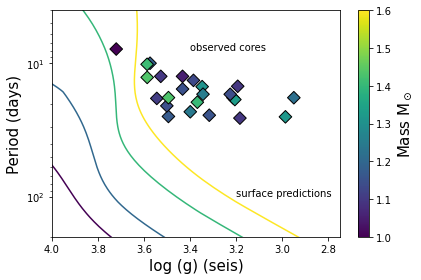

In [15]:
minm=1.0
maxm=1.6
plt.scatter( df.seismiclogg,PcoreTc, c=df.massfit, vmin=minm, vmax=maxm,s=80,
            marker='D', edgecolors='k', cmap='viridis')
#plt.scatter( scvz['seismiclogg'][goodfit],scvz['Protfit'][goodfit], c=scvz['massfit'][goodfit], marker='p',
#            vmin=1.0, vmax=1.6,s=10)
cmap=colormaps['viridis']
color=m10['mass'][300]
plt.plot(m10['logg'], m10['Prot(days)'], c=cmap((1.0-minm)/(maxm-minm)))
plt.plot(m12['logg'], m12['Prot(days)'], c=cmap((1.2-minm)/(maxm-minm)))
plt.plot(m14['logg'], m14['Prot(days)'], c=cmap((1.4-minm)/(maxm-minm)))
plt.plot(m16['logg'], m16['Prot(days)'], c=cmap((1.6-minm)/(maxm-minm)))
plt.ylabel('Period (days)', fontsize=15)
plt.xlabel('log (g) (seis)', fontsize=15) 
#cbar=plt.colorbar(label='Mass M$_\odot$')#, size=15)
plt.colorbar().set_label(label='Mass M$_\odot$',size=15)
#cbar.ax.tick_params(labelsize=20)
plt.text(3.2, 100, 'surface predictions')
plt.text(3.4, 8, 'observed cores')
#plt.text(175, 10, 'weird')
#plt.plot([0,1000],[0,1000])
plt.xlim(4, 2.75)
plt.yscale('log')
plt.ylim(200, 4)
plt.tight_layout()        # auto-adjust boundaries after you have added everything
plt.draw()                # make sure it updates (possibly unnecessary)
plt.savefig('SamplePcorePsurftheory.jpg', bbox_inches='tight')

In [50]:
cmap=colormaps['viridis']
print(cmap(0))
print(cmap(1))

(0.267004, 0.004874, 0.329415, 1.0)
(0.26851, 0.009605, 0.335427, 1.0)


In [9]:
m10.to_csv('rocrit10track.csv')
m12.to_csv('rocrit12track.csv')
m14.to_csv('rocrit14track.csv')
m16.to_csv('rocrit16track.csv')
m18.to_csv('rocrit18track.csv')
m20.to_csv('rocrit20track.csv')



In [5]:
m20=rocrit.get_track((1.99,0,0))